# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [ ]:
# .. your code here ..

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [144]:
# .. your code here ..
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('gambling.csv')
import matplotlib.pyplot as plt
#df=df.drop(labels=['Collage','Private'],axis=1)
df.shape



(14218, 22)

Get rid of any _rows_ that have nans in them:

In [84]:
# .. your code here ..
df=df.dropna(axis=0)
df.shape

(13003, 22)

Display the `dtypes` of your dset:

In [85]:
# .. your code here ..
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [98]:
# .. your code here ..
df.Date=pd.to_datetime(df.Date,errors='coerce')

In [90]:
df=df.dropna(axis=0)
df.shape

(13003, 22)

In [103]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df=pd.DataFrame([df.Longitude,df.Latitude]).T
    print(df.shape)
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model=KMeans(n_clusters=7)

    #Create Cluster
    model.fit(df)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='.', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

    

In [41]:

#df=pd.DataFrame([df.Longitude,df.Latitude])

In [92]:
df.shape

(13003, 22)

(13003, 2)
[[-87.66470815  41.77274605]
 [-87.75695915  41.89328662]
 [-87.63109897  41.69663084]
 [-87.61952555  41.80353324]
 [-87.68540588  41.9813113 ]
 [-87.58264919  41.75266313]
 [-87.70960992  41.87811546]]


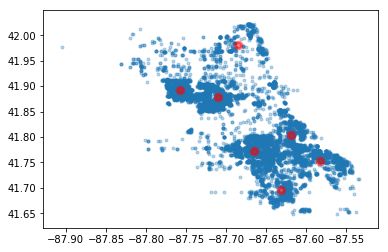

In [142]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [101]:
# .. your code here ..
df.shape
df
data=pd.DataFrame(df[df.Date>'2011-01-01'])
data.shape

(3130, 22)

(3130, 2)
[[-87.61916277  41.7917633 ]
 [-87.75480142  41.88985386]
 [-87.6349544   41.7055019 ]
 [-87.71061917  41.87537947]
 [-87.58033163  41.75055701]
 [-87.68692804  41.98387683]
 [-87.6649696   41.7756854 ]]


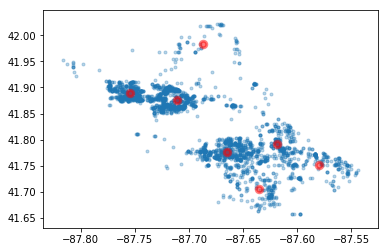

In [128]:
# Print & Plot your data
doKMeans(data)